# Загрузка данных

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/api-data-2/API.csv
/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_growth.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita_growth.csv


In [ ]:
# copy of BaseLine 

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [490]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [491]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [492]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [493]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [494]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [495]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [5]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

# Работа с данными

До удаления всех строковых данных поработаем с ними.  
В плане сделать следующие действия:
1. Вытащить название стран из адреса отеля.
2. Оценить тональность положительных и отрицательных отзывов и добавить по 4 новых признака тональности.
3. Поработать с данными о стране нахождения отеля и всаимосвязи с экономикой страны (хочу попробовать прицепить показатель ВВП на душу населения для страны). А чтобы привязать этот показатель к отзывам, надо понять и ВВП на душу населения той страны, посетитель которой оставил отзыв. Плюс посчитать разницу между ВВП на душу страны-отеля и страны-посетителя. Есть предположение, что чем выше эта разница, тем большую оценку склонен оставить посетитель (тем ему больше понравиться находиться в отеле, тем он будет менее придирчив).

In [6]:
# как видим, страна содержится в последнем слове
# создаем новый признак страны отеля 'hotel_country'
def hotel_country(hotel_address):
    hotel_address = str(hotel_address)
    hotel_address = hotel_address.split(' ')
    return hotel_address[-1]
data['hotel_country'] = data['hotel_address'].apply(hotel_country)
print(data['hotel_country'].nunique())
print(data['hotel_country'].unique())
# как видим - в датасете представлены отели всего из 6 разных стран.
# Кроме того закралась ошибка в названии Соединенного королевства.
# Устраню ее
data['hotel_country'] = data['hotel_country'].apply(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
print(data['hotel_country'].unique())
country_hotel_list = list(data['hotel_country'].unique())

6
['Italy' 'Netherlands' 'Spain' 'Kingdom' 'France' 'Austria']
['Italy' 'Netherlands' 'Spain' 'United Kingdom' 'France' 'Austria']


In [499]:
# сколько уникальных национальностей посетителей
print(data['reviewer_nationality'].nunique())


227


In [7]:
# подгружаю внешний датасет с показателями ВВП на душу населения
gdp = pd.read_csv('/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv')


gdp.shape

(266, 64)

In [8]:
# логично смотреть данные о ВВП на год написания отзыва
# для этого сначала преобразуем данные о дате в date_time
# а затем создаем колонку с годом написания отзыва
data['review_date'] = pd.to_datetime(data['review_date'])
data['year'] = data['review_date'].dt.year
# составляю список годов, в которые были оставлены отзывы и список колонок для удаления

year_list = list(data['year'].unique())
year_str_list = list(map(str, year_list))

col_list = list(gdp.columns)
col_to_drop = []
for elem in col_list:
    if elem == 'Country Name':
        pass
    elif elem in year_str_list:
        pass
    else:
        col_to_drop.append(elem)
        

# удаляем все ненужные данные из датасета с данными о ВВП
gdp = gdp.drop(col_to_drop, axis = 1)



In [9]:
# чтобы подставить данные в наш основной датасет создаем словарь с полученными данными
gdp_dict = gdp.to_dict('records')
def add_gdp(row, dict_gdp):
    '''функция принимает строку и возвращает значение из словаря'''
    country = row.hotel_country
    year = row.year
    search_country = list(filter(lambda item: item['Country Name'] == country, dict_gdp))
    result = search_country[0][str(year)]
    return result
data['gdp_of_hotel'] = data.apply(lambda row: add_gdp(row, gdp_dict), axis=1)    


In [10]:
# Аналогичным образом создаем признак 'gdp_of_reviewer' (ВВП на душу страны гостя) 
# и с помощью похожей функции и тем же словарем подтягивем данные
# проверяем пропуски, все данные заполнились
# как выяснилось, данные в колонке "reviewer_nationality" содержат лишние пробелы
# в начале и в конце строк
# кроме того, есть страны, где вместо национальности гостя стоит пробел
#  в таком случае заменяю его на национальность отеля
# Много времени занял поиск соответствия стран в словаре и датасете. 
# При отсутствии такого соответствия данные заменялись константой по открытым данным
data['gdp_of_reviewer'] = 0

def add_gdp_rew(row, gdp_dict):
    '''функция принимает строку и возвращает значение из словаря'''
    
    country = row.reviewer_nationality
    if country == ' ':
        country = ' ' + row.hotel_country + ' '
    country = country[1:]
    country = country[:-1]
    
    if country == ' ':
        country = row.hotel_country
    if country == 'United States of America':
        country = 'United States'
    if country == 'Macedonia':
        country = 'North Macedonia'
    if country == 'Crimea':
        country = 'Russian Federation'
    if country == 'Russia':
        country = 'Russian Federation'
    if country == 'Slovakia':
        country = 'Slovak Republic'
    if country == 'Jersey':
        return 55324
    if country == 'Hong Kong':
        country = 'Hong Kong SAR, China'
    if country == 'South Korea':
        country = "Korea, Dem. People's Rep."
    if country == 'Brunei':
        country = 'Brunei Darussalam'
    if country == 'Egypt':
        country = 'Egypt, Arab Rep.'
    if country == 'Taiwan':
        return 69151
    if country == 'Iran':
        country = 'Iran, Islamic Rep.'
    if country == 'Guernsey':
        return 66189
    if country == 'Yemen':
        country = 'Yemen, Rep.'
    if country == 'Macau':
        return 67470
    if country == 'Abkhazia Georgia':
        country = 'Georgia' 
    if country == 'Syria':
        country = 'Syrian Arab Republic'
    if country == 'Cura ao':
        country = 'Curacao'
    if country == 'Venezuela':
        return 7259.276
    if country == 'Kyrgyzstan':
        country = 'Kyrgyz Republic'
    if country == 'Saint Lucia':
        country = 'St. Lucia'
    if country == 'Ivory Coast':
        return 2123
    if country == 'U S Virgin Islands':
        country = "Virgin Islands (U.S.)"
    if country == 'United States Minor Outlying Islands':
        country = 'United States'
    if country == 'Bahamas':
        country = 'Bahamas, The'
    if country == 'Saint Martin':
        country = 'St. Martin (French part)'
    if country == 'Palestinian Territory':
        return 2490
    if country == 'Congo':
        country = 'Congo, Rep.'
    if country == 'Democratic Republic of the Congo':
        country = 'Congo, Dem. Rep.'
    if country == 'Saint Kitts and Nevis':
        country = 'St. Kitts and Nevis'
    if country == 'Laos':
        country = 'Lao PDR'
    if country == 'French Guiana':
        return 18313
    if country == 'St Maarten':
        country = "Sint Maarten (Dutch part)"
    if country == 'Cook Islands':
        return 2229
    if country == 'Saint Barts':
        return 51735
    if country == 'Swaziland':
        return 3200
    if country == 'Guadeloupe':
        return 25235.68
    if country == 'Bonaire St Eustatius and Saba':
        return 24800
    if country == 'Turks Caicos Islands':
        country = 'Turks and Caicos Islands'
    if country == 'Vatican City':
        return 21198
    if country == 'Antigua Barbuda':
        country = 'Antigua and Barbuda'
    if country == 'Gambia':
        country = 'Gambia, The'
    if country == 'Saint Vincent Grenadines':
        country = 'St. Vincent and the Grenadines'
    if country == 'Cape Verde':
        country = 'Cabo Verde'
    if country == 'Reunion':
        return 25333
    if country == 'Falkland Islands Malvinas':
        return 77692
    if country == 'Antarctica':
        return 0
    if country == 'Anguilla':
        return 19216
    if country == 'Martinique':
        return 24118
    if country == 'Montserrat':
        return 31100
    if country == 'St Pierre and Miquelon':
        return 46200
    if country == 'Cocos K I':
        return 16700
    if country == 'Wallis and Futuna':
        return 12640
    if country == 'Eritrea':
        return 623
    if country == 'East Timor':
        country = 'Timor-Leste'
    if country == 'Svalbard Jan Mayen':
        country = 'Norway'
    if country == 'Central Africa Republic':
        country = 'Central African Republic'

    year = row.year
    search_country = list(filter(lambda item: item['Country Name'] == country, gdp_dict))

    result = search_country[0][str(year)]
    return result
data['gdp_of_reviewer'] = data.apply(lambda row: add_gdp_rew(row, gdp_dict), axis=1)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [11]:
# как видим, появились пропуски в данных, заполним их среднемировыми значениями
# при желании, можно будет вернуться к данным пропускам
data['gdp_of_reviewer'] = data['gdp_of_reviewer'].fillna(data['gdp_of_reviewer'].mean())
# разницу решил не делать, так как признаки обладают высокой мультиколлинеарностью
data['diff_gdp'] = data['gdp_of_hotel'] - data['gdp_of_reviewer']


## Тональность отзывов
На вебинаре шла речь о признаке тональности отзывов. Добавлю эти признаки в датасет

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer() 

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [13]:
rev1 = "The hotel was very good, I love it!"
rev2 = "It was just horrible, the worst ever."

pol_of_rew = sent_analyzer.polarity_scores(rev1)
pol_of_rew

{'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

In [14]:
def sentiment_of_rew_neg(rew):
    pol_of_rew = sent_analyzer.polarity_scores(rew)
    return pol_of_rew['neg']

def sentiment_of_rew_neu(rew):
    pol_of_rew = sent_analyzer.polarity_scores(rew)
    return pol_of_rew['neu']

def sentiment_of_rew_pos(rew):
    pol_of_rew = sent_analyzer.polarity_scores(rew)
    return pol_of_rew['pos']

def sentiment_of_rew_compound(rew):
    pol_of_rew = sent_analyzer.polarity_scores(rew)
    return pol_of_rew['compound']

data['neg_negative_review'] = data['negative_review'].apply(lambda rew: sentiment_of_rew_neg(rew))
data['neu_negative_review'] = data['negative_review'].apply(lambda rew: sentiment_of_rew_neu(rew))
data['pos_negative_review'] = data['negative_review'].apply(lambda rew: sentiment_of_rew_pos(rew))
data['compound_negative_review'] = data['negative_review'].apply(lambda rew: sentiment_of_rew_compound(rew))

data['neg_positive_review'] = data['positive_review'].apply(lambda rew: sentiment_of_rew_neg(rew))
data['neu_positive_review'] = data['positive_review'].apply(lambda rew: sentiment_of_rew_neu(rew))
data['pos_positive_review'] = data['positive_review'].apply(lambda rew: sentiment_of_rew_pos(rew))
data['compound_positive_review'] = data['positive_review'].apply(lambda rew: sentiment_of_rew_compound(rew))


In [89]:
data_copy = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

# Заполнение пропусков

In [90]:
# заполняем нулями пропуски в координатах
data['lat'] = data['lat'].fillna(0)
data['lng'] = data['lng'].fillna(0)


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

# Преобразование признаков
В данном разделе попробую поработать с каждым отдельным признаком или с группой однотипных принзнаков


hotel_address — адрес отеля;  
review_date — дата, когда рецензент разместил соответствующий отзыв;  
average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;  
hotel_name — название отеля;  
reviewer_nationality — страна рецензента;  
negative_review — отрицательный отзыв, который рецензент дал отелю;  
review_total_negative_word_counts — общее количество слов в отрицательном отзыв;  
positive_review — положительный отзыв, который рецензент дал отелю;  
review_total_positive_word_counts — общее количество слов в положительном отзыве.  
reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;  
total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;  
total_number_of_reviews — общее количество действительных отзывов об отеле;  
tags — теги, которые рецензент дал отелю;  
days_since_review — количество дней между датой проверки и датой очистки;  
additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.  
lat — географическая широта отеля;  
lng — географическая долгота отеля

In [91]:
# сначала разберусь со строковыми признаками: некоторые можно закодировать,
# например - страну отеля
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
encoder = ce.OneHotEncoder(cols=['hotel_country'], use_cat_names=True) # указываем столбец для кодирования
hotel_country = encoder.fit_transform(data['hotel_country'])
data = pd.concat([data, hotel_country], axis=1)

In [92]:
# аналогичным образом закодирую год отзыва
encoder = ce.OneHotEncoder(cols=['year'], use_cat_names=True) # указываем столбец для кодирования
hotel_country = encoder.fit_transform(data['year'])
data = pd.concat([data, hotel_country], axis=1)

In [93]:
# признак года удаляю
data.drop('year', axis = 1, inplace = True)

<AxesSubplot:>

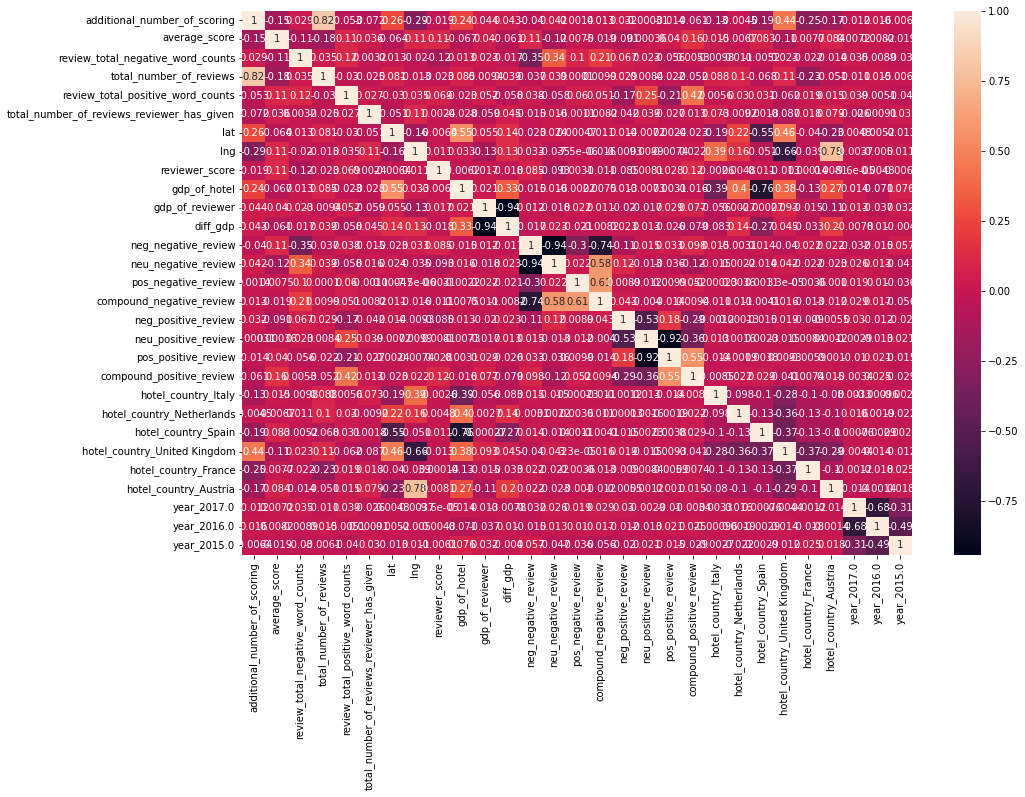

In [94]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [95]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,compound_positive_review,hotel_country_Italy,hotel_country_Netherlands,hotel_country_Spain,hotel_country_United Kingdom,hotel_country_France,hotel_country_Austria,year_2017.0,year_2016.0,year_2015.0
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0.9615,1,0,0,0,0,0,1,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0.3400,0,1,0,0,0,0,0,1,0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,2015-11-26,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,0.6908,0,0,1,0,0,0,0,0,1
3,Piazza Della Repubblica 17 Central Station 201...,241,2015-10-17,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,0.9153,1,0,0,0,0,0,0,0,1
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,2016-05-16,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,0.7717,0,1,0,0,0,0,0,1,0


In [96]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" и 'datetime' обучаться не будет, 
# просто выберим их и удалим

object_columns = [s for s in data.columns if data[s].dtypes == 'object']

dt_columns = [s for s in data.columns if data[s].dtypes == "datetime64[ns]"]

data.drop(object_columns, axis = 1, inplace=True)

data.drop(dt_columns, axis = 1, inplace=True)

In [97]:
# Попробую удалить еще признаки долготы и широты и сравнить результаты
del_columns = ['lat', 'lng']
data.drop(del_columns, axis = 1, inplace=True)
# и действительно одно лишь их удаление немного улучшило результат

Остался самый сложный этап - этап стандартизации признаков.
Наши признаки не имеют стандарнтного распределения а также имеются выбросы, поэтому предлагаю выполнить нормализацию всех признаков методом ROBUSTSCALER.

In [98]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
columns_to_process = data[['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given',
       'gdp_of_hotel', 'gdp_of_reviewer', 'diff_gdp']]
                     
scaler = preprocessing.RobustScaler()

data_s = scaler.fit_transform(columns_to_process)
data_s = pd.DataFrame(data_s, columns=columns_to_process.columns)
data = data.drop(columns_to_process, axis=1)
data = pd.concat([data,data_s], axis=1).reset_index()
data = data.drop('index', axis=1)

In [99]:
data

,sample,reviewer_score,neg_negative_review,neu_negative_review,pos_negative_review,compound_negative_review,neg_positive_review,neu_positive_review,pos_positive_review,compound_positive_review,...,year_2015.0,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,gdp_of_hotel,gdp_of_reviewer,diff_gdp
0,0,0.0,0.129,0.747,0.125,-0.0554,0.000,0.671,0.329,0.9615,...,0,1.146640,-0.428571,2.047619,5.928222,3.000000,-0.285714,-1.127186,-0.134838,-0.579918
1,0,0.0,0.216,0.784,0.000,-0.2960,0.379,0.000,0.621,0.3400,...,0,0.551935,0.285714,0.047619,1.176183,-0.647059,0.571429,0.553991,0.101800,0.273523
2,0,0.0,0.000,1.000,0.000,0.0000,0.000,0.260,0.740,0.6908,...,1,-0.600815,-0.142857,-0.285714,-0.727162,-0.352941,1.714286,-1.937554,2.110588,-1.754723
3,0,0.0,1.000,0.000,0.000,-0.7096,0.000,0.621,0.379,0.9153,...,1,-0.203666,1.000000,-0.428571,-0.241028,0.941176,0.857143,-1.384803,3.227844,-1.810442
4,0,0.0,1.000,0.000,0.000,-0.7096,0.000,0.230,0.770,0.7717,...,0,1.004073,1.000000,-0.428571,1.041191,-0.235294,-0.142857,0.553991,0.000000,0.306461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,1,8.8,1.000,0.000,0.000,-0.7096,0.000,1.000,0.000,0.0000,...,0,-0.476578,0.857143,-0.428571,-0.618679,-0.058824,1.000000,-0.078866,-0.591267,0.147680
515734,1,9.2,1.000,0.000,0.000,-0.7096,0.045,0.857,0.098,0.7264,...,0,-0.140530,0.000000,-0.428571,0.444535,4.823529,-0.285714,0.714248,-6.493979,2.496276
515735,1,8.3,0.000,1.000,0.000,0.0000,0.000,0.465,0.535,0.7845,...,0,0.236253,-2.285714,0.142857,0.251631,-0.117647,2.571429,0.000000,0.947166,-0.306461
515736,1,9.2,1.000,0.000,0.000,-0.7096,0.000,1.000,0.000,0.0000,...,0,0.048880,-0.428571,-0.428571,-0.231240,-0.294118,3.571429,-0.078866,-0.179581,0.014477


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   sample                                      515738 non-null  int64  
 1   reviewer_score                              515738 non-null  float64
 2   neg_negative_review                         515738 non-null  float64
 3   neu_negative_review                         515738 non-null  float64
 4   pos_negative_review                         515738 non-null  float64
 5   compound_negative_review                    515738 non-null  float64
 6   neg_positive_review                         515738 non-null  float64
 7   neu_positive_review                         515738 non-null  float64
 8   pos_positive_review                         515738 non-null  float64
 9   compound_positive_review                    515738 non-null  float64
 

# Обучение и выгрузка результатов

In [101]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [102]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [103]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 27), (386803, 27), (386803, 26), (309442, 26), (77361, 26))

In [104]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [105]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [106]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of 100 | elapsed:    6.9s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished
[Parallel(n_jobs=96)]: Using backend ThreadingBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  10 out of 100 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    0.2s finished


In [107]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8838828064436303


<AxesSubplot:>

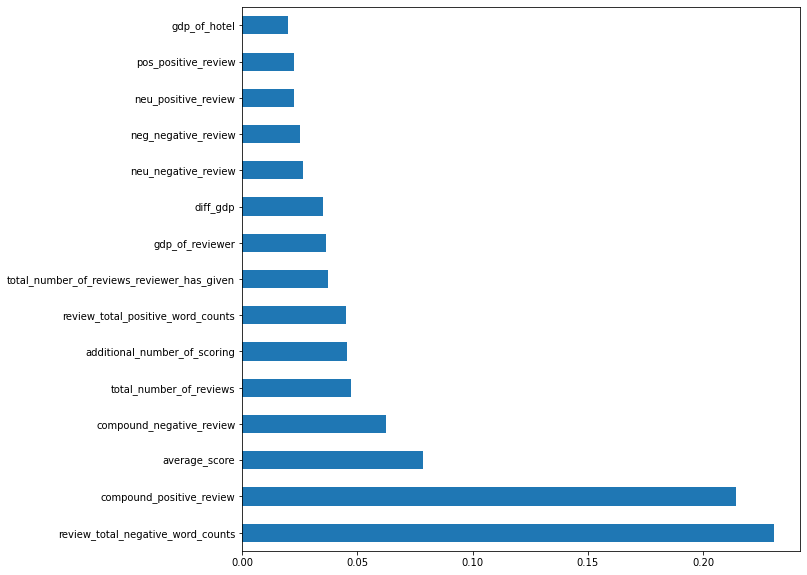

In [108]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [109]:
test_data.sample(10)

,reviewer_score,neg_negative_review,neu_negative_review,pos_negative_review,compound_negative_review,neg_positive_review,neu_positive_review,pos_positive_review,compound_positive_review,hotel_country_Italy,...,year_2015.0,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,gdp_of_hotel,gdp_of_reviewer,diff_gdp
101159,0.0,1.000,0.000,0.000,-0.7096,0.209,0.711,0.080,-0.7346,1,...,0,-0.036660,-0.571429,-0.428571,0.767129,1.823529,-0.142857,-1.297619,0.000000,-0.717827
15837,0.0,0.000,0.654,0.346,0.5719,0.000,0.549,0.451,0.6249,0,...,0,-0.077393,1.285714,0.095238,-0.214519,-0.176471,0.857143,-0.078866,0.762599,-0.290371
44665,0.0,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0,...,0,-0.226069,0.285714,-0.285714,-0.175775,-0.529412,0.000000,-0.548324,-7.459646,2.110284
88280,0.0,1.000,0.000,0.000,-0.7096,0.000,1.000,0.000,0.0000,0,...,0,-0.203666,-1.285714,-0.428571,-0.345432,-0.235294,0.428571,0.000000,0.000000,0.000000
19905,0.0,1.000,0.000,0.000,-0.6486,0.000,0.363,0.637,0.9683,0,...,0,1.729124,-1.285714,-0.238095,1.242251,0.588235,-0.285714,0.000000,0.000000,0.000000
9712,0.0,0.000,0.730,0.270,0.3804,0.000,0.605,0.395,0.9327,1,...,0,-0.425662,-0.428571,0.047619,-0.176998,1.176471,0.714286,-1.297619,-6.712703,1.454105
57624,0.0,0.328,0.672,0.000,-0.5980,0.000,0.781,0.219,0.4754,1,...,0,-0.120163,0.285714,0.238095,0.302202,0.294118,-0.285714,-1.297619,1.761051,-1.287624
60960,0.0,1.000,0.000,0.000,-0.7096,0.040,0.638,0.322,0.9477,0,...,0,-0.059063,0.142857,-0.428571,-0.415987,2.058824,0.142857,0.000000,6.084530,-1.968683
96945,0.0,0.000,0.648,0.352,0.7650,0.000,0.549,0.451,0.6249,0,...,0,-0.407332,1.142857,0.476190,-0.542822,-0.235294,-0.285714,0.866989,4.133997,-0.857970
82360,0.0,1.000,0.000,0.000,-0.7096,0.000,0.364,0.636,0.7906,0,...,1,0.692464,0.714286,-0.428571,0.227569,-0.176471,0.428571,0.479858,0.820419,0.000000


In [110]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [111]:
sample_submission

,reviewer_score,id
0,8.7580,488440
1,7.7820,274649
2,8.7140,374688
3,9.7860,404352
4,9.6510,451596
...,...,...
128930,8.8510,495812
128931,9.5200,315577
128932,8.4450,511968
128933,9.5290,303386


In [112]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=96)]: Using backend ThreadingBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  10 out of 100 | elapsed:    0.2s remaining:    1.5s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    0.3s finished


In [113]:
predict_submission

array([8.762 , 7.799 , 8.714 , ..., 8.441 , 9.529 , 7.1095])

In [114]:
list(sample_submission)

['reviewer_score', 'id']

In [115]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.762,488440
1,7.799,274649
2,8.714,374688
3,9.794,404352
4,9.651,451596
5,8.871,302161
6,7.951,317079
7,7.531,13963
8,8.204,159785
9,7.565,195089
